### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [2]:
# To check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [3]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Date'] = df['Date/Time'].dt.date
df['Time'] = df['Date/Time'].dt.time

#df.head()

# Group by date and count the number of pickups
total_pickup = df.groupby(df["Date"]).size().sort_values(ascending = False)
#print(total_pickup)
# Find the date with the highest number of pickups
highest_pickup_day = total_pickup.idxmax()
print(f"The date with the highest number of pickups is {highest_pickup_day}")


The date with the highest number of pickups is 2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [4]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
filter_data = total_pickup.iloc[:1]
print(filter_data)

# Get the count of pickups on the highest date

highest_pickups = total_pickup.max()
print(f"The count of pickups on the highest date is {highest_pickups}")


Date
2014-08-07    32759
dtype: int64
The count of pickups on the highest date is 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [5]:
# Count the number of unique TLC base companies
unique_TLC = df["Base"].nunique()
print(f"The number of unique TLC base companies are {unique_TLC}")


The number of unique TLC base companies are 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [6]:
# Group by TLC base company and count the number of pickups
highest_pickup_company= df.groupby("Base").Base.count().sort_values(ascending= False)
print(highest_pickup_company)

# Find the TLC base company with the highest number of pickups
print(f" The TLC base company with the highest number of pickups is {highest_pickup_company.idxmax()}")

Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64
 The TLC base company with the highest number of pickups is B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [7]:
# Group by TLC base company and count the number of pickups
highest_pickup_company= df.groupby("Base").Base.count().sort_values(ascending= False)
print(f"TLC base company and count the number of pickups{highest_pickup_company}")

TLC base company and count the number of pickupsBase
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [11]:
# Extract the hour from the 'Date/Time' column
df['hour']= df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
total_hourwise_pickup = df.groupby("hour").size().sort_values(ascending = False)
#print(total_hourwise_pickup)

# Find the hour with the highest number of pickups
highest_pickup_hour = total_hourwise_pickup.idxmax()
print(f"The hour with the highest number of pickups is {highest_pickup_hour}")


The hour with the highest number of pickups is 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

Date
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
2014-08-06    30495
2014-08-07    32759
2014-08-08    30411
2014-08-09    26286
2014-08-10    20584
2014-08-11    22632
2014-08-12    29646
2014-08-13    29788
2014-08-14    30457
2014-08-15    28974
2014-08-16    26234
2014-08-17    21209
2014-08-18    21956
2014-08-19    24834
2014-08-20    27955
2014-08-21    32304
2014-08-22    29512
2014-08-23    27097
2014-08-24    22036
2014-08-25    22093
2014-08-26    24550
2014-08-27    27018
2014-08-28    28597
2014-08-29    27424
2014-08-30    23930
2014-08-31    23271
dtype: int64


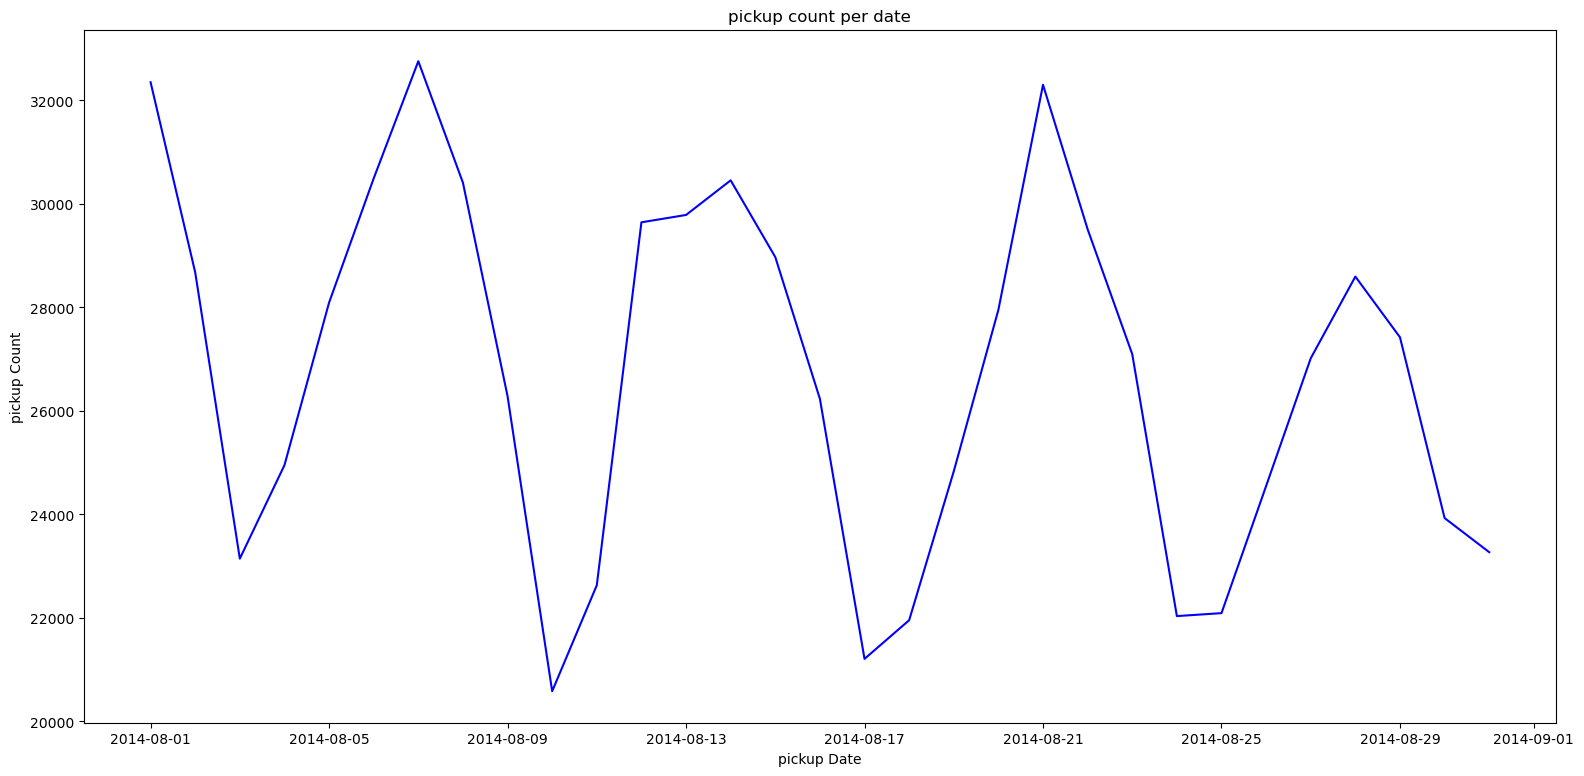

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date and count the number of pickups
pickup_perdate_count = df.groupby("Date").size()
print(pickup_perdate_count)

# Create a line plot to visualize the number of pickups over time
x = pickup_perdate_count.index.tolist()
y = pickup_perdate_count.values.tolist()

plt.figure(figsize = (19,9))
plt.xlabel("pickup Date")
plt.ylabel("pickup Count")
plt.title("pickup count per date")
plt.plot(x,y,color = "blue")


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

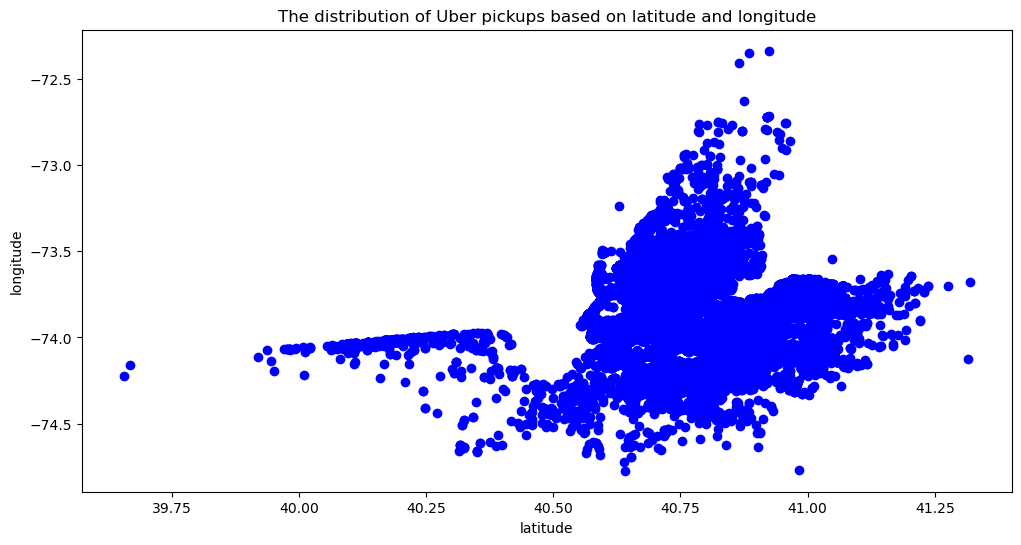

In [19]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(12,6))
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("The distribution of Uber pickups based on latitude and longitude")
plt.scatter(x=df["Lat"],y=df["Lon"],color = "Blue")

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

<BarContainer object of 5 artists>

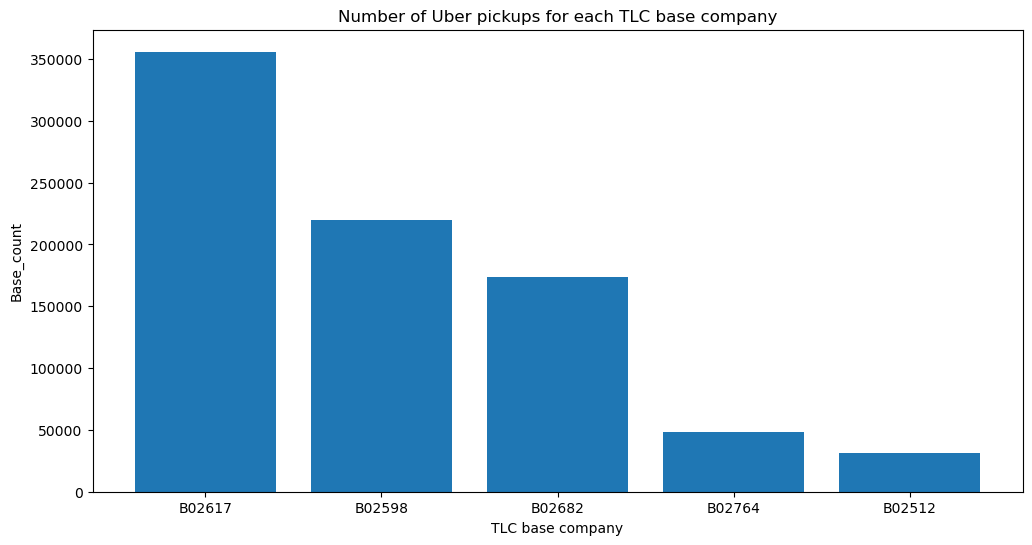

In [20]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
base_company_count = df["Base"].value_counts()
x = base_company_count.index.tolist()
y=base_company_count.values.tolist()
plt.figure(figsize=(12,6))
plt.xlabel("TLC base company")
plt.ylabel("Base_count")
plt.title("Number of Uber pickups for each TLC base company")
plt.bar(x,y)

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Friday       148674
Saturday     132225
Thursday     124117
Wednesday    115256
Sunday       110246
Tuesday      107124
Monday        91633
Name: Date/Time, dtype: int64


<AxesSubplot:title={'center':'Percentage distribution of Uber pickups for each day'}, ylabel='Date/Time'>

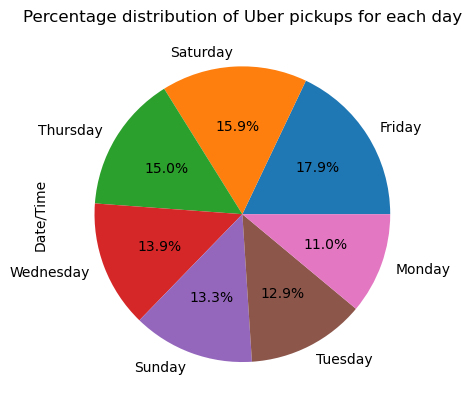

In [26]:
# Group by day of the week and count the number of pickups
pickup_perday= df["Date/Time"].dt.day_name().value_counts()
print(pickup_perday)

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
pickup_perday.plot(kind="pie", autopct ="%1.1f%%", title = "Percentage distribution of Uber pickups for each day")

#### Insights based on above graph
* Maximum Pickups were done one Friday in August month.
* Minimum Pickups were done one Monday in August month.
* As we can see almost 50% of pickups were done on combination of [Thursday,Friday and Saturday] in August month.